C:\Users\73497\AppData\Local\Temp\ipykernel_25520\1205276838.py:55: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


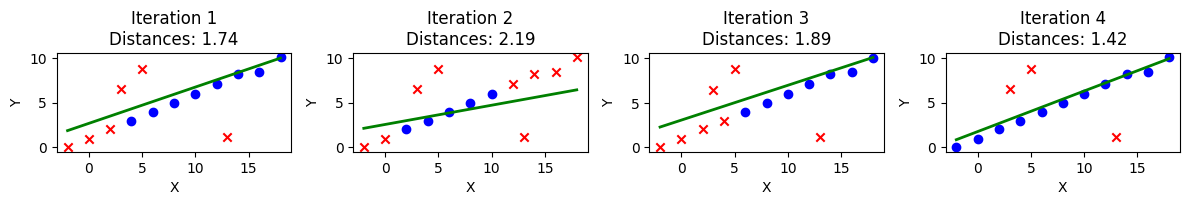

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 待拟合的点
x = [-2, 0, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 16, 18]
y = [0, 0.9, 2.0, 6.5, 2.9, 8.8, 3.95, 5.03, 5.97, 7.1, 1.2, 8.2, 8.5, 10.1]

# RANSAC参数
n_iterations = 20 # 最大迭代次数
n_inliers = 3  # 随机抽取的点的数量
best_inliers = None
best_line = None
threshold = 1.5  # 停止迭代的距离阈值

# 创建大的图形，组合子图
plt.figure(figsize=(12, 8))
stop = False

for iteration in range(n_iterations):
    if stop:
        break
    
    # 随机选择n_inliers个数据点
    random_indices = np.random.choice(len(x), n_inliers, replace=False)
    random_X = np.array(x)[random_indices]
    random_y = np.array(y)[random_indices]

    # 拟合直线
    A = np.vstack([random_X, np.ones(len(random_X))]).T
    m, c = np.linalg.lstsq(A, random_y, rcond=None)[0]

    # 计算拟合的直线对所有数据点的误差
    distances = np.abs(np.array(y) - (m * np.array(x) + c))

    # 计算内点
    inlier_mask = distances < threshold
    n_current_inliers = np.sum(inlier_mask)

    if n_current_inliers > n_inliers:
        n_inliers = n_current_inliers
        best_inliers = inlier_mask
        best_line = (m, c)

    # 绘制当前的直线
    plt.subplot(5, 4, iteration + 1)
    plt.scatter(np.array(x)[inlier_mask], np.array(y)[inlier_mask], color='blue', marker='o', label='Inliers') # 内点标记为蓝圈
    plt.scatter(np.array(x)[~inlier_mask], np.array(y)[~inlier_mask], color='red', marker='x', label='Outliers') # 外点标记为红叉

    current_line_X = np.arange(-2, 18, 0.01)
    current_line_y = m * current_line_X + c
    plt.plot(current_line_X, current_line_y, color='green', linewidth=2, label='RANSAC line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Iteration {iteration + 1}\nDistances: {np.mean(distances):.2f}')
    plt.tight_layout()

    if np.mean(distances) < threshold:
        stop = True

plt.show()
